# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals_raunak as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

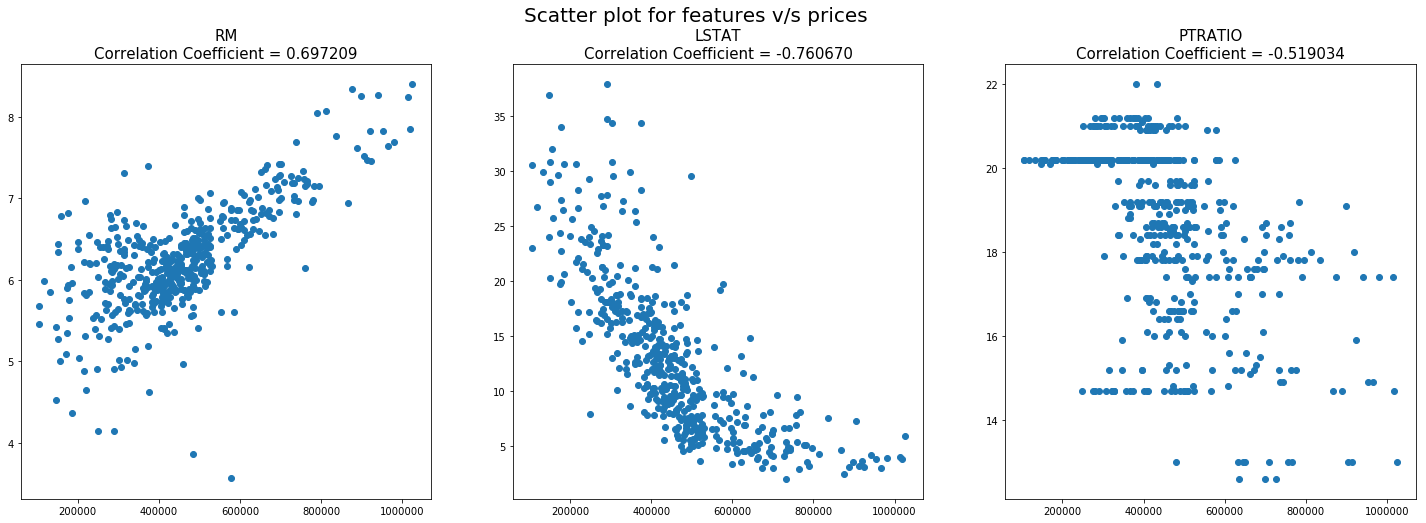

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax_arr = plt.subplots(1, 3, figsize=(25,8))
plt.suptitle("Scatter plot for features v/s prices", fontsize=20)
ax_arr[0].scatter(prices, features.iloc[:,0])
corr_coef = np.corrcoef(prices, features.iloc[:,0])[0,1]
ax_arr[0].set_title(features.columns[0] + "\nCorrelation Coefficient = {:2f}".format(corr_coef), fontsize=15)

ax_arr[1].scatter(prices, features.iloc[:, 1])
corr_coef = np.corrcoef(prices, features.iloc[:,1])[0,1]
ax_arr[1].set_title(features.columns[1] + "\nCorrelation Coefficient = {:2f}".format(corr_coef), fontsize=15)

ax_arr[2].scatter(prices, features.iloc[:, 2])
corr_coef = np.corrcoef(prices, features.iloc[:,2])[0,1]
ax_arr[2].set_title(features.columns[2] + "\nCorrelation Coefficient = {:2f}".format(corr_coef), fontsize=15)

**Answer: **
From the above scatter plots, we can see that - 
1. There's a positive relationship between 'RM' and 'MEDV', indicating higher the number of rooms, higher is the value of the house. A positive linear correlation of 0.69 also supports this statement. As expected, houses with more rooms (implying more space, in general) will cost more.
2. There's a negative relationship between 'LSTAT' and 'MEDV', indicating higher the percentage value of lower class workers in the neighborhood, lower is the value of the house. A negative linear correlation of -0.76 also supports this statement. Intuitively, lower class workers would essentially bring down the value of the houses in the neighborhood and thus, supporting a negative linear correlation between these two values.
3. From the scatter plot, ratio of students to teachers in the neighborhood schools does not have any linear relationship with the value of the house. A linear correlation coefficient of -0.52 tells us there isn't a strong linear relationship between ratio of student to teachers in the neighborhood schools and value of the houses in those neighborhoods. This plot gives us information and intuition about how the house prices are affected because of student to teacher ratio in the nieghborhood schools.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [4]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true=y_true, y_pred=y_predict)
    
    # Return the score
    return score

** Formula for R^2 Score **

Total sum of squares:
$
SS_{total} = \sum{(y_i - \bar{y})^2}
$

Residual sum of squares:
$
SS_{res} = \sum{(y_i - \hat{y})^2}
$

$R^2$ Coefficient of determination:
$
R^2 = 1 - \frac{SS_{total}}{SS_{res}}
$

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [5]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable.
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:** 

The model has captured 92.3% of the variance in the dependent variable that is explained by the independent variable. Yes, this model has successfully captured most of the variation of the target variable because of a high R^2 value.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=246)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **

Benefits of splitting a dataset into some ratio of training and testing subsets for a learning algorithm, specifically a supervised learning algorithm - 
1. Model estimates the parameters using only the training dataset and these parameters are evaluated using testing dataset, simulating real-world scenarios where we might want to predict the outcome variable based on some input data.
2. This avoids overfitting as well as underfitting our model parameters to the dataset that is available. Evaluating model on testing dataset gives us more confidence that the model will perform similarly on unseen/new data.
3. The training split should represent an appropriate sample of the population. If the splits are biased, then our model may overfit or underfit. Hence, splitting the data is not enough to avoid these issues. 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

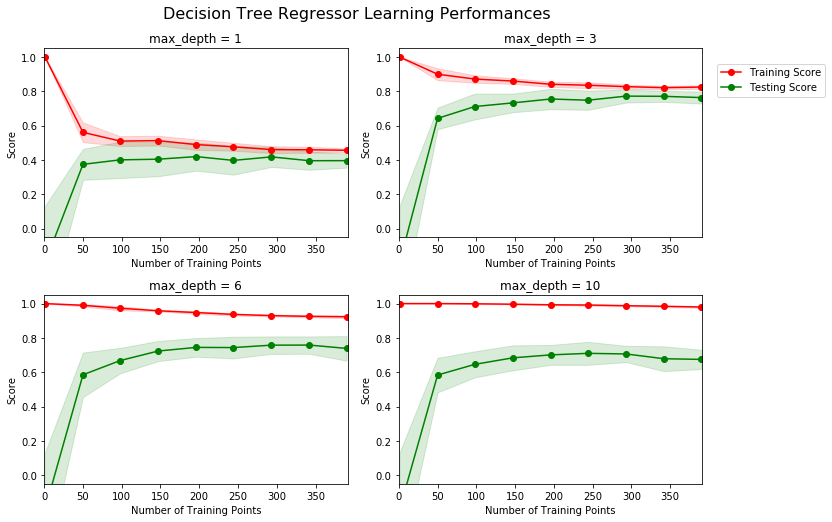

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **
1. Maximum depth = 3, since for this particular model we see the training and testing scores converge at a high r^2 value of approximately 0.8
2. As we add more training points, the training and testing scores converge to approximately 0.8 as the r^2 score.
3. Since the scoring the for the training and testing converge at approximately 300 training points and starts to saturate, adding more training points would not benefit the model. 

For the learning curve with maximum depth = 3, we can see that as we add more data, training score decreases whereas the testing score improves and eventually they converge at approximately 300 data points. Smaller number of training points implies less variance in the data and hence a good score for the training data set and a not so good score for the testing data set. As the model 'looks at' more data points and learns different patterns, the testing score improves because now the model is able to generalize well. 

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

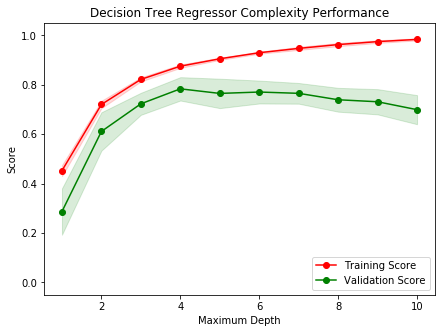

In [8]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **
1. The model suffers from high bias when trained with a maximum depth of 1, since the training and validation scores are low.
2. The model suffers from high variance when trained with a maximum depth of 10 as the validation score in fact decreases whereas the training score is close to a perfect r^2 score of 1.0. Thus, the model with maximum depth of 10 fails to generalize over the cross-validation set.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **

1. Model with maximum depth of 4 is the best one that generalizes to unseen data.
2. From the model complexity graph, we can see that the validation score starts to drop as the maximum depth (complexity of the model) increase beyond 4, whereas the training score continues to improve and achieve almost a perfect r^2 score of 1.0. This clearly suggests that the model starts to overfit as we increase the maximum depth beyond 4 and it is unable to generalize to validation set. With maximum depth of 4, we achieve the highest score on the validation set, suggesting it is the appropriate model complexity for the given data.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **

Grid search technique - 
1. Define hyper-parameters of a model. Numeric hyper-parameters should be discrete.
2. Train the model over all possible combinations of the hyper-parameters. If we have 2 hyper-parameters with 2 possible values each, we will have 2x2=4 possible combinations (i.e. the 'grid' of hyper-parameters) and correspondingly, 4 different models.
3. Evaluate each of these models using the cross-validation set. Evaluate each of these model using the same and appropriate metric.
4. Select the best-performing model based on our evaluation metric.
5. Using the hyper-parameters of our best-performing model, evaluate the model on our test data set to make sure we are on the right track.


Grid search technique can be used to select optimal hyper-parameters from all possible combinations of different values (as provided by the developer) for a given learning algorithm. For example, if we are building a random forest for classification, we may have `maximum_depth` (maximum depth of trees in the forest) and `number_of_trees` (number of trees in the forest) as the hyper-parameters for the model. Suppose we define the following values for each - 
* maximum_depth = [2,5]
* number_of_features = [square_root(total_features), log(total_features)]

Grid search technique will train a random forest for each of the combination of the above values. We can then select the best model based on our evaluation metric, thus optimizing our learning algorithm and better than random values for these hyper-parameters. 

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **

k-fold cross-validation training technique is one of the most widely used cross-validation technique used. When training, we divide the training data set into *k* groups of data. Our algorithm is trained using *k-1* groups of data and validated on the $k^{th}$ group, until all the groups of data are used as validation. For each validation group, we re-train the model. The final metric that is reported is usually averaged across all the groups. k-fold cross-validation can be best explained by the following figure - 
<img src="k-fold.png" alt="Drawing" style="width: 500px;"/>

k-fold cross-validation alleviates the problem of testing hyper-parameters only on a particular subset of data. When grid searching, particular set of hyper-parameters may work well only with a particular subset, thus giving us a false impression that the model works well. However, if we use k-fold cross-validation with grid searching, hyper-parameters are tested for different subsets of data in the training and the validation set. This technique gives us hyper-parameters that are robust to changes in the training set and thus avoid overfitting.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [9]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.2, train_size=None, random_state=0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [10]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **

The optimal model has a maximum depth of 4, which is exactly what we guessed previously using the model complexity curve!

### Feature Importance

Which features are important in predicting the house prices? The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the **Gini importance**. 

**Gini importance** - Every time a split of a node is made on variable m the gini impurity criterion for the two descendent nodes is less than the parent node. Adding up the gini decreases for each individual variable over all trees in the forest gives a fast variable importance that is often very consistent with the permutation importance measure.

Reference - 
- https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#giniimp
- http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

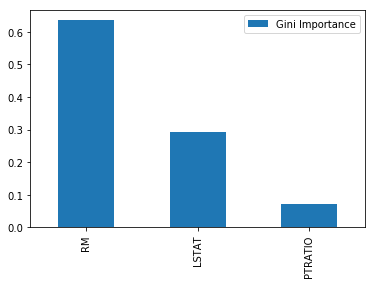

In [11]:
feature_importance = pd.DataFrame(reg.feature_importances_, index=X_train.columns, columns=['Gini Importance'])
feature_importance.plot(kind='bar')

### Visualizing the Tree

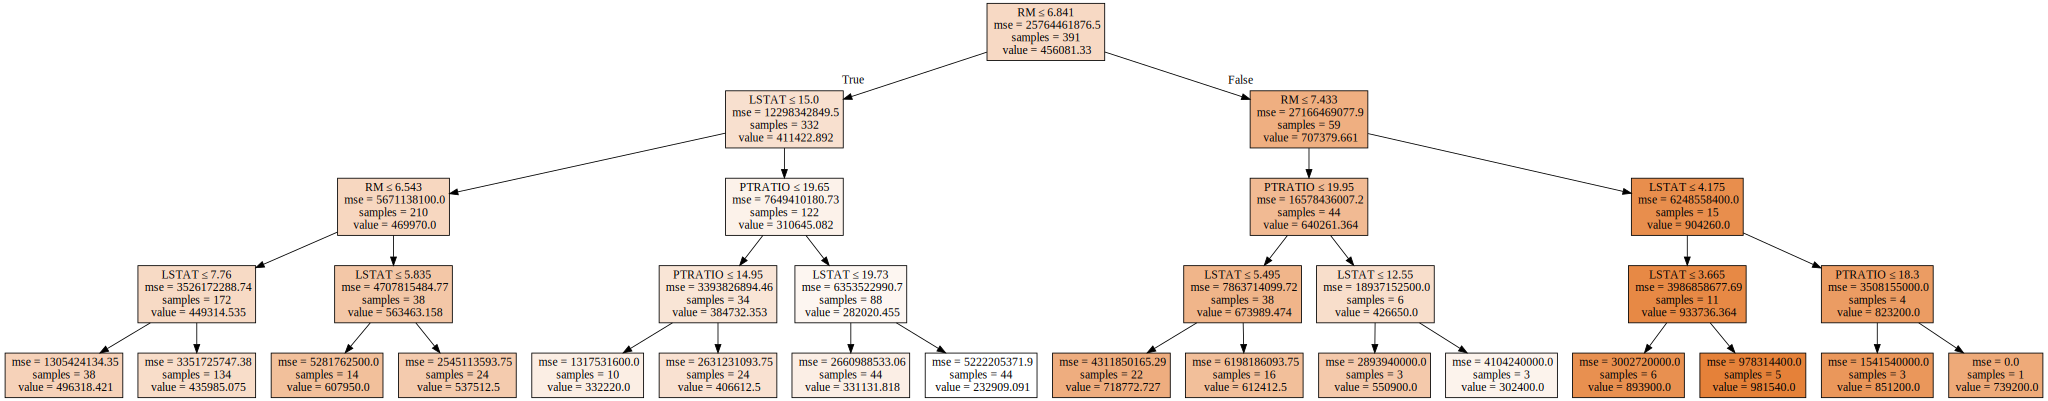

In [12]:
from IPython.display import Image
from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(reg, out_file=None,
                                feature_names=X_train.columns,
                                class_names="PRICES",
                                filled=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Test data performance

Define a function to plot a residual plot for regression problems. A randomly dispersed residual plot around the horizontal axis implies that the regression model is appropriate for the data; else, a non-linear regression model is more appropriate. 

In [13]:
y_pred = reg.predict(X_test)

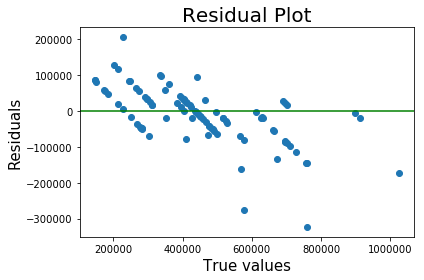

In [14]:
def plot_residual_plot(y_true, y_pred):
    residuals = [(pred_val - true_val) for true_val, pred_val in zip(y_true, y_pred)]
    plt.plot(y_true, residuals, 'o')
    plt.axhline(0, color='green')
    plt.title("Residual Plot", fontsize=20)
    plt.xlabel("True values", fontsize=15)
    plt.ylabel("Residuals", fontsize=15)
    plt.tight_layout()

plot_residual_plot(y_true=y_test, y_pred=y_pred)

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [15]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $406,612.50
Predicted selling price for Client 2's home: $232,909.09
Predicted selling price for Client 3's home: $893,900.00


In [16]:
X_train.describe()

,RM,LSTAT,PTRATIO
count,391.000000,391.000000,391.000000
mean,6.252141,12.780077,18.543478
std,0.620402,6.942496,2.065045
min,3.863000,1.980000,12.600000
25%,5.882000,7.390000,17.400000
50%,6.185000,11.650000,19.100000
75%,6.591500,16.950000,20.200000
max,8.337000,37.970000,22.000000


In [17]:
y_train.describe()

count    3.910000e+02
mean     4.560813e+05
std      1.607188e+05
min      1.050000e+05
25%      3.612000e+05
50%      4.410000e+05
75%      5.145000e+05
max      1.018500e+06
Name: MEDV, dtype: float64

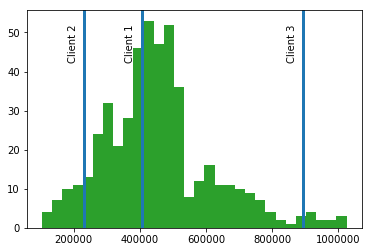

In [18]:
# From review
for i,price in enumerate(reg.predict(client_data)):
    plt.hist(prices, bins = 30)
    plt.axvline(price, lw = 3)
    plt.text(price-50000, 50, 'Client '+str(i+1), rotation=90)

**Answer: **

Based on the current model, recommended prices for each client to sell their home is shown above.

Based on the data exploration (please refer to the scatter plots of the features with respect to the selling price of the houses) of historic data, 
* Selling price for Client 1's home is reasonable, compared to the mean values of the features and price of houses. Mean value of features in the training data are close to the feature values of Client 1's home. Therefore, as expected, the selling price of the home is also close to the mean value of all the prices in the training data.
* Selling price for Client 2's home is affected by the high neighborhood poverty level. Also, it has less rooms and a high student-teacher ratio of nearby schools, making the prediction reasonable.
* Selling price for Client 3's home, which is the biggest house with a low student-teacher ratio and low poverty, is reasonable.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [19]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **

* **Relevant data** - Raw values of the data collected in 1978 are not useful today (2017). However, these values along with other economic factors like inflation and interest rates may be useful in understanding a long term trend in the pricing of houses.

* **Features** - Yes, I think other factors like quality of appliances in the home, square feet of the plot area, presence of pool and gym, economic factors like inflation and interest rates, income of buyer should also be factored in the model.

* **Robustness** - Considering the trials, the range of the predicted prices is high, making inconsistent predictions.

* **Applicability** - Data collected for an urban city like Boston is not applicable to a rural city, as the factors may behave in different manner.

* **Fairness** - I think each neighborhood has certain characteristics that define the area and that is why it is fair to judge a price of an individual house based on the entire neighborhood. However, it should not be the only criteria as there will be different types of houses in the same neighborhood and as such, these factors should also be taken into consideration.

The constructed model even though it fits well to the current data, more robust cross-validation strategies must be used to test the stability of the model. Also, other important features should also be taken into consideration while constructing the model. Keeping the robustness of the current model in mind, I would not recommend using it in the real-world setting.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.